# Visualisation et statistiques 
## Sur un extrait du corpus complet 
### 10 codes - nombre d'article : 38299

In [80]:
# Importer les librairies et les données 
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import spacy
from collections import Counter

nlp = spacy.load("fr_core_news_sm")


In [96]:
data = pd.read_csv("../data/annotation_10.csv")
print(len(data))
colonnes = data[["num", "title", "id", "date", "code", "mod_title", "body", "type", "nbr_mot"]]

38299


In [82]:
#Récupérer les listes des tailles et des codes 

# liste des noms des codes (78) 
list_codes = data["code"].drop_duplicates().to_list()
print(f"Liste des noms des codes : {list_codes}")

# liste des nombres d'articles dans chacun des codes 
list_tailles = [len(data.query("`code` == @code")) for code in list_codes]
print(f"Liste des noms du nombre d'articles dans les codes: {list_tailles}")

# Tuple contenant le nombre d'article associé à son code 
lst_len_code = [(code,len(data.query("`code` == @code"))) for code in list_codes]
print(f"Liste de tuples des codes et du nombre d'article : {lst_len_code}")

Liste des noms des codes : ['Code civil', 'Code général des impôts', 'Code de justice militaire (nouveau)', 'Code des ports maritimes', 'Code des postes et des communications électroniques', 'Code de la route', 'Code du sport', 'Code du travail', "Code de l'action sociale et des familles", 'Code de la santé publique']
Liste des noms du nombre d'articles dans les codes: [2883, 2495, 731, 30, 716, 1158, 1962, 11339, 3613, 13372]
Liste de tuples des codes et du nombre d'article : [('Code civil', 2883), ('Code général des impôts', 2495), ('Code de justice militaire (nouveau)', 731), ('Code des ports maritimes', 30), ('Code des postes et des communications électroniques', 716), ('Code de la route', 1158), ('Code du sport', 1962), ('Code du travail', 11339), ("Code de l'action sociale et des familles", 3613), ('Code de la santé publique', 13372)]


# Représentation des données

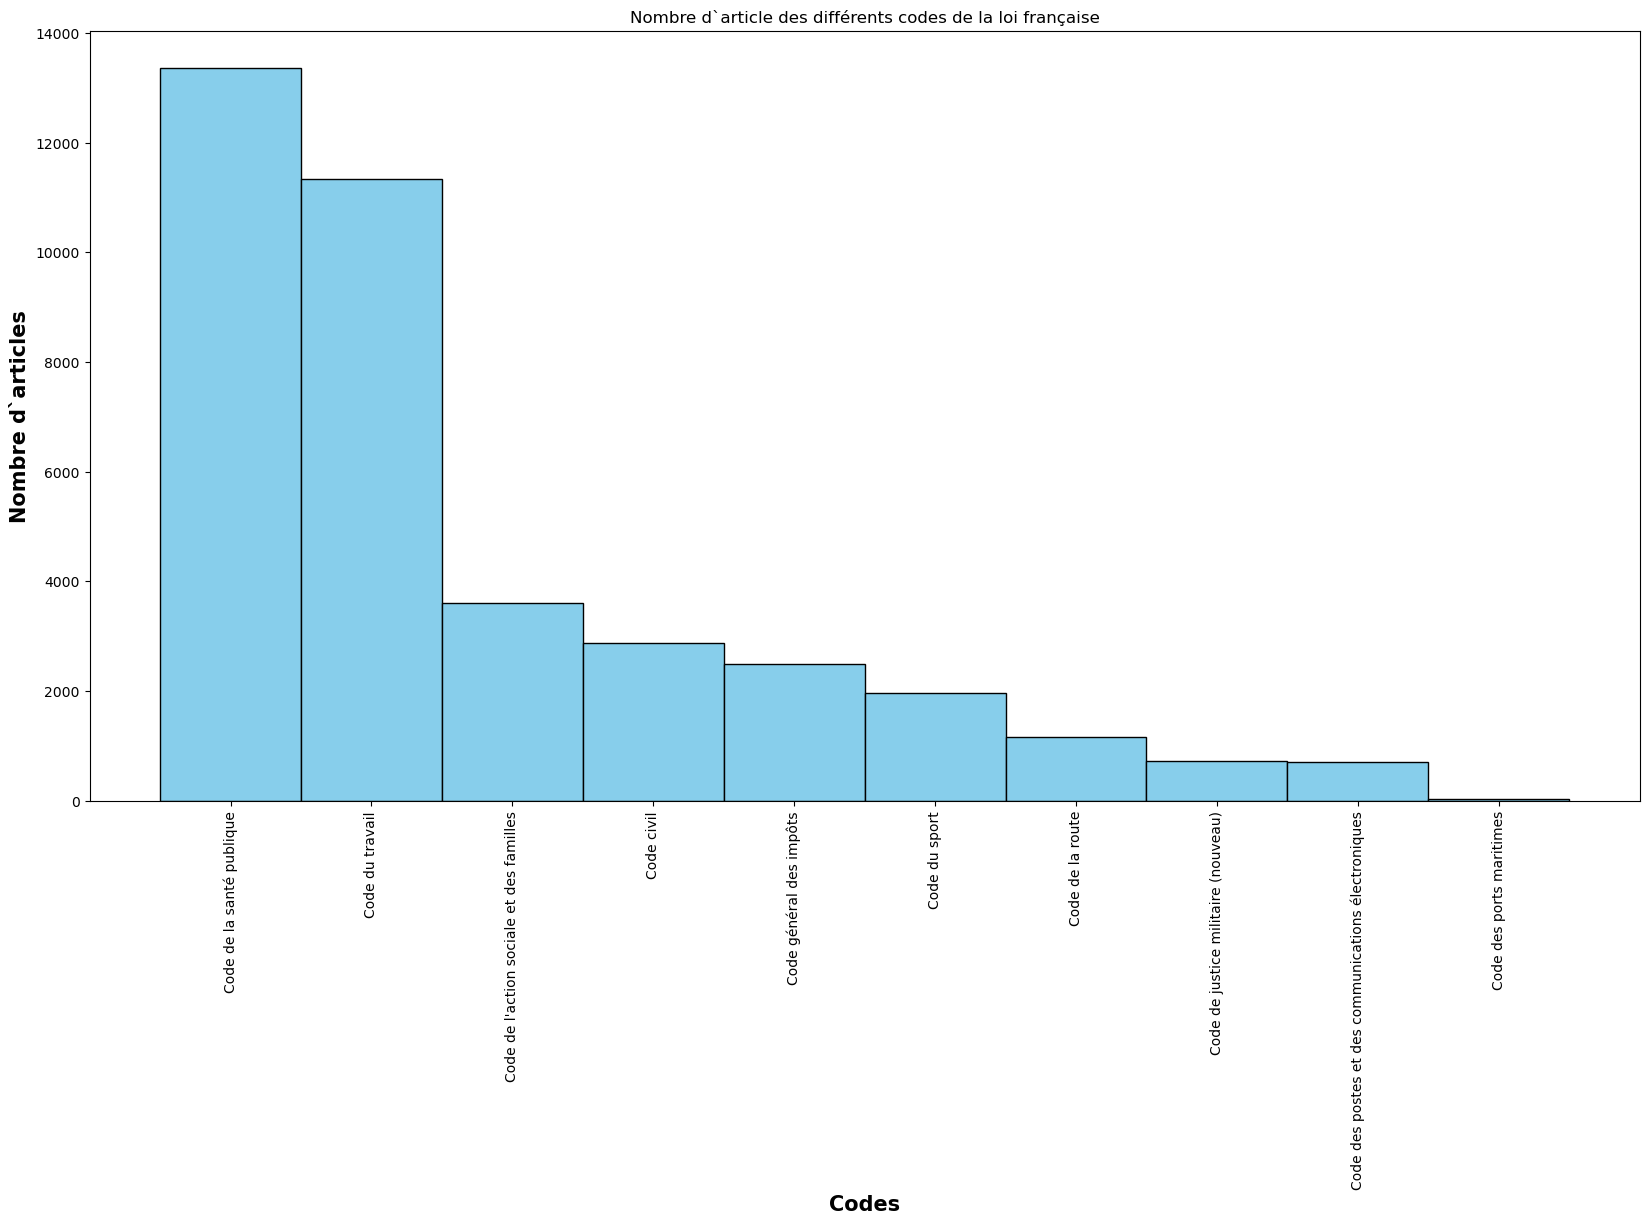

In [83]:
# BarPlot représentant le nombre d'articles par code trié par taille
bar_width = 1
indices = range(len(list_codes))
sorted_values, sorted_categories = zip(*sorted(zip(list_tailles, list_codes), reverse=True))
plt.figure(figsize=(20, 10))
plt.bar(indices, sorted_values, color=['skyblue'], width=bar_width, edgecolor='black')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Nombre d`articles', fontweight='bold', fontsize=15)
plt.title('Nombre d`article des différents codes de la loi française')
plt.xticks(indices, sorted_categories, rotation=90)
plt.show()

In [84]:
# Tuple contenant le nombre de mots associé à son code 
mean_word_code = data.groupby('code')['nbr_mot'].mean()
sum_word_code = data.groupby('code')['nbr_mot'].sum()

print(f"Liste des codes et de la moyenne de nombre de mots : {mean_word_code}")
print(f"Liste des codes et du nombre de mots : {sum_word_code}")

Liste des codes et de la moyenne de nombre de mots : code
Code civil                                              74.420742
Code de justice militaire (nouveau)                     92.694938
Code de l'action sociale et des familles               204.527263
Code de la route                                       201.264249
Code de la santé publique                              161.093180
Code des ports maritimes                               148.933333
Code des postes et des communications électroniques    248.504190
Code du sport                                          194.777268
Code du travail                                        109.919658
Code général des impôts                                363.519840
Name: nbr_mot, dtype: float64
Liste des codes et du nombre de mots : code
Code civil                                              214555
Code de justice militaire (nouveau)                      67760
Code de l'action sociale et des familles                738957
Code de la route   

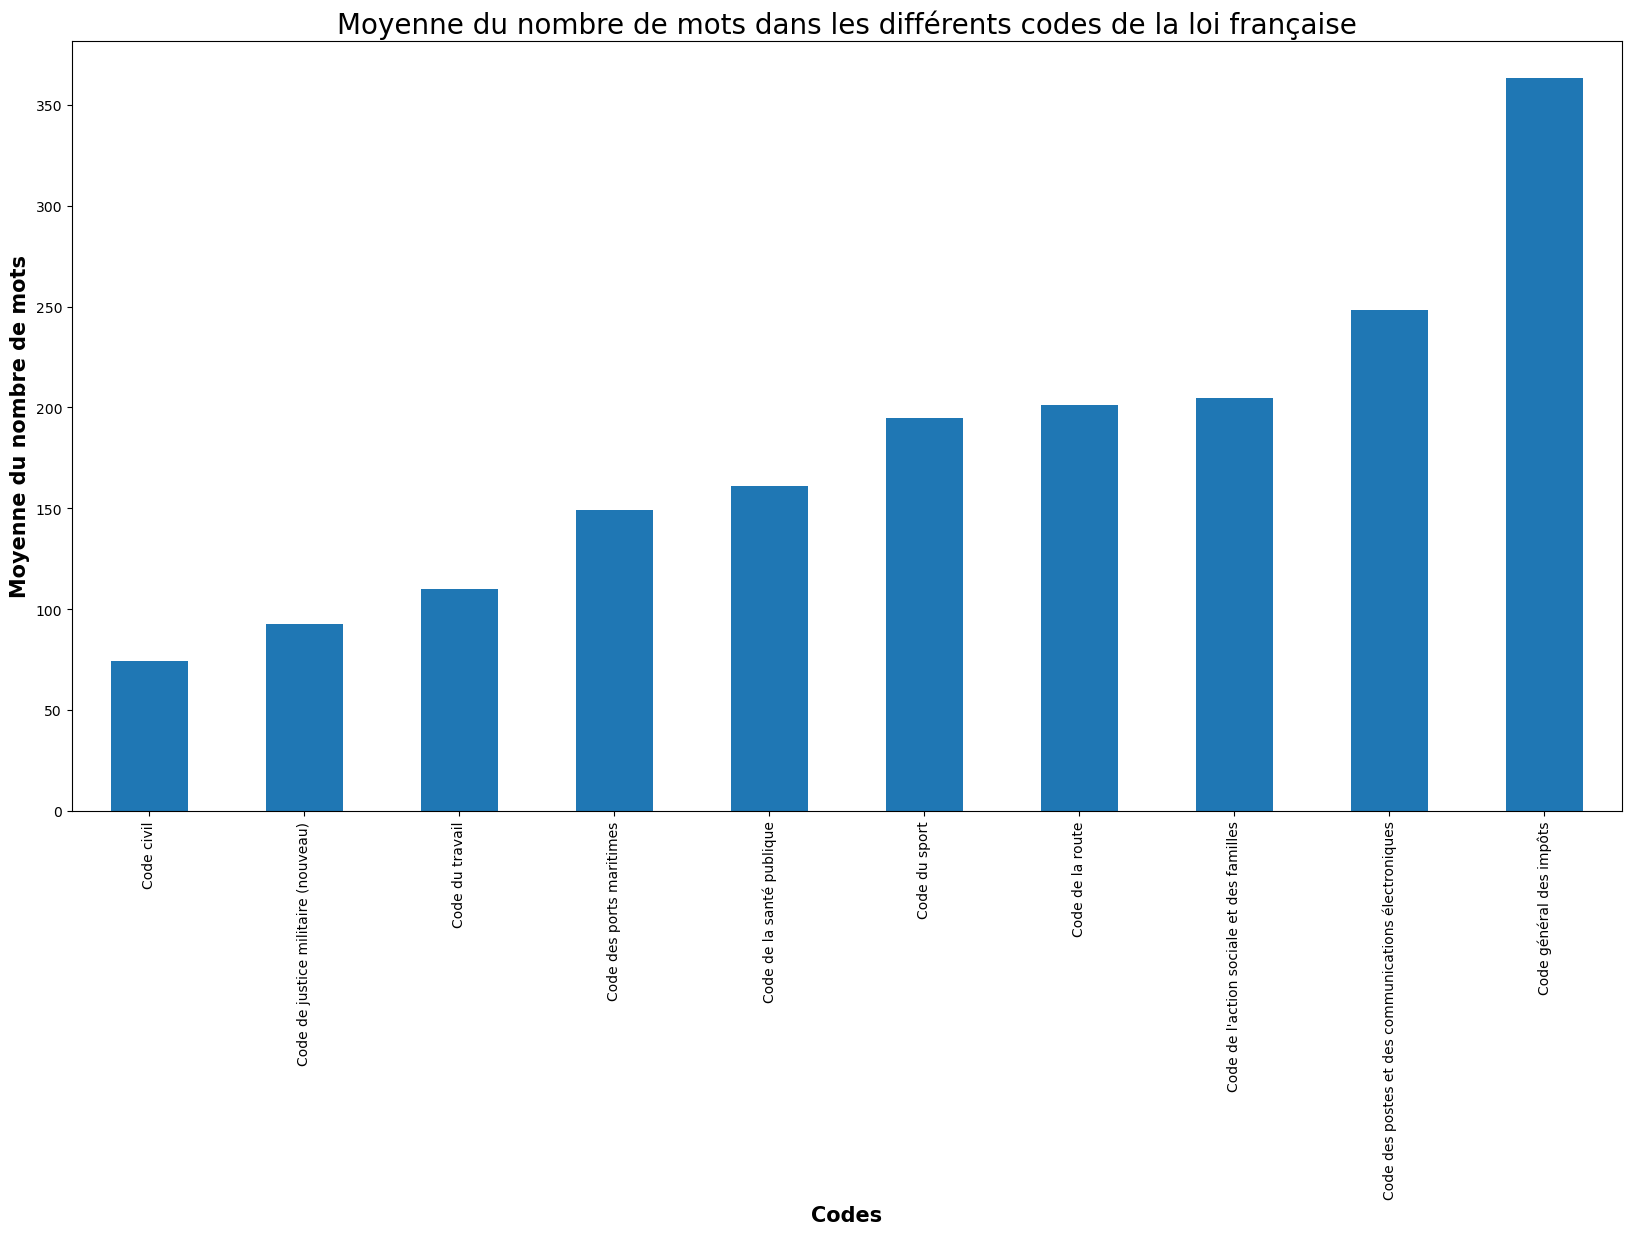

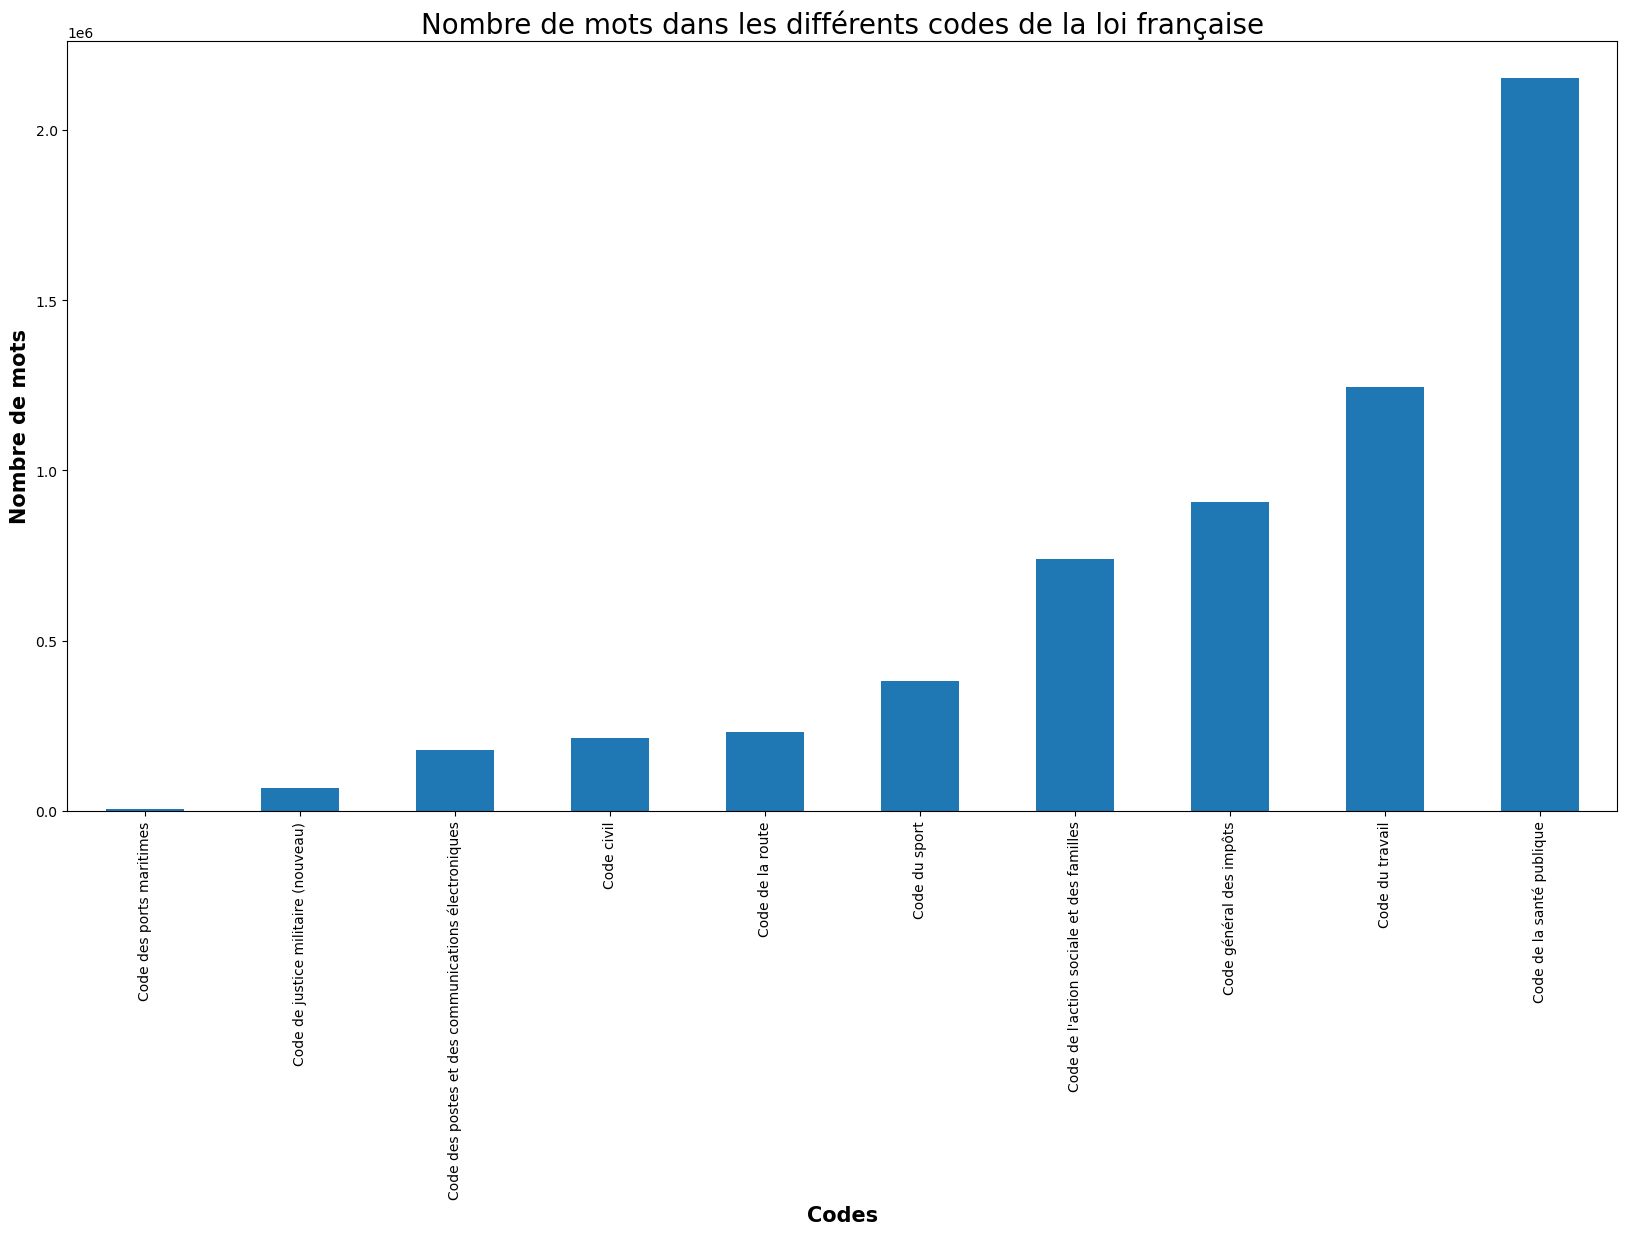

In [85]:
# BarPlot représentant la moyenne de nombre de mots par article par code triés par taille

sorted_word_code = mean_word_code.sort_values()

bar_width = 1
indices = range(len(list_codes))
plt.figure(figsize=(20, 10))
sorted_word_code.plot(kind='bar')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Moyenne du nombre de mots', fontweight='bold', fontsize=15)
plt.title('Moyenne du nombre de mots dans les différents codes de la loi française', fontsize=20)
plt.xticks(indices, rotation=90)
plt.show()

# BarPlot représentant la somme de nombres de mots par code triés

sorted_word_code = sum_word_code.sort_values()

bar_width = 1
indices = range(len(list_codes))
plt.figure(figsize=(20, 10))
sorted_word_code.plot(kind='bar')
plt.xlabel('Codes', fontweight='bold', fontsize=15)
plt.ylabel('Nombre de mots', fontweight='bold', fontsize=15)
plt.title('Nombre de mots dans les différents codes de la loi française',fontsize=20)
plt.xticks(indices, rotation=90)
plt.show()

Liste des types d'article : ['autre', 'L', 'R', 'D', 'A']
Liste de tuples des codes et du nombre d'article : [('autre', 5403), ('L', 10489), ('R', 16996), ('D', 4742), ('A', 669)]


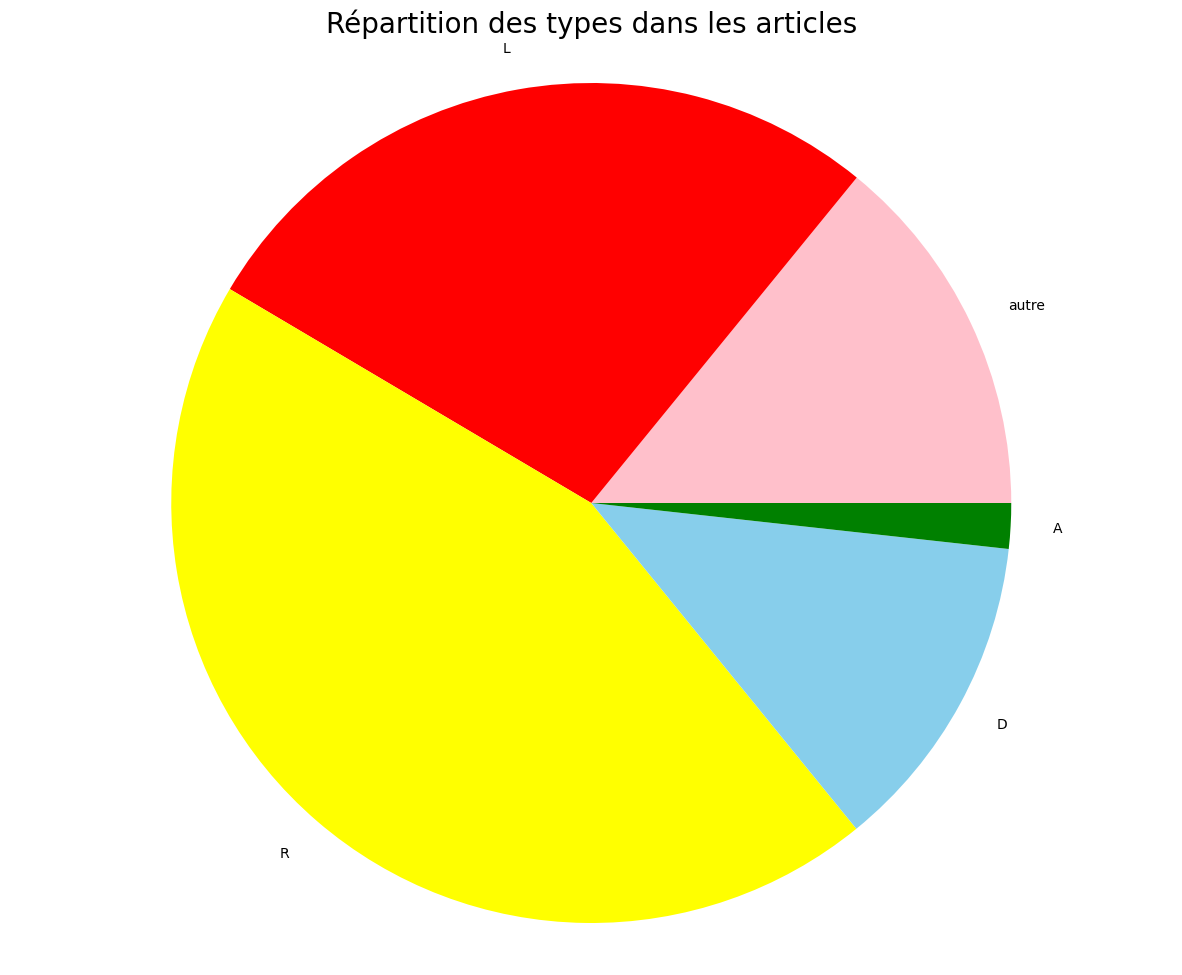

In [86]:
# Type d'article: L R D A (autres chiffres) 
list_types = data["type"].drop_duplicates().to_list()
print(f"Liste des types d'article : {list_types}")

# Tuple contenant le nombre d'articles pour chaque type 
lst_type_nbr = [(type,len(data.query("`type` == @type"))) for type in list_types]
print(f"Liste de tuples des codes et du nombre d'article : {lst_type_nbr}")

# Camembert de la distribution des types dans le corpus

nom = [type[0] for type in lst_type_nbr]
taille = [type[1] for type in lst_type_nbr]
#print(taille)

plt.figure(figsize=(15, 12))  
plt.pie(taille, labels=nom, colors=["pink", "red", "yellow", "skyblue", "green"])
plt.title(f"Répartition des types dans les articles", fontsize=20)
plt.axis('equal')
plt.show()

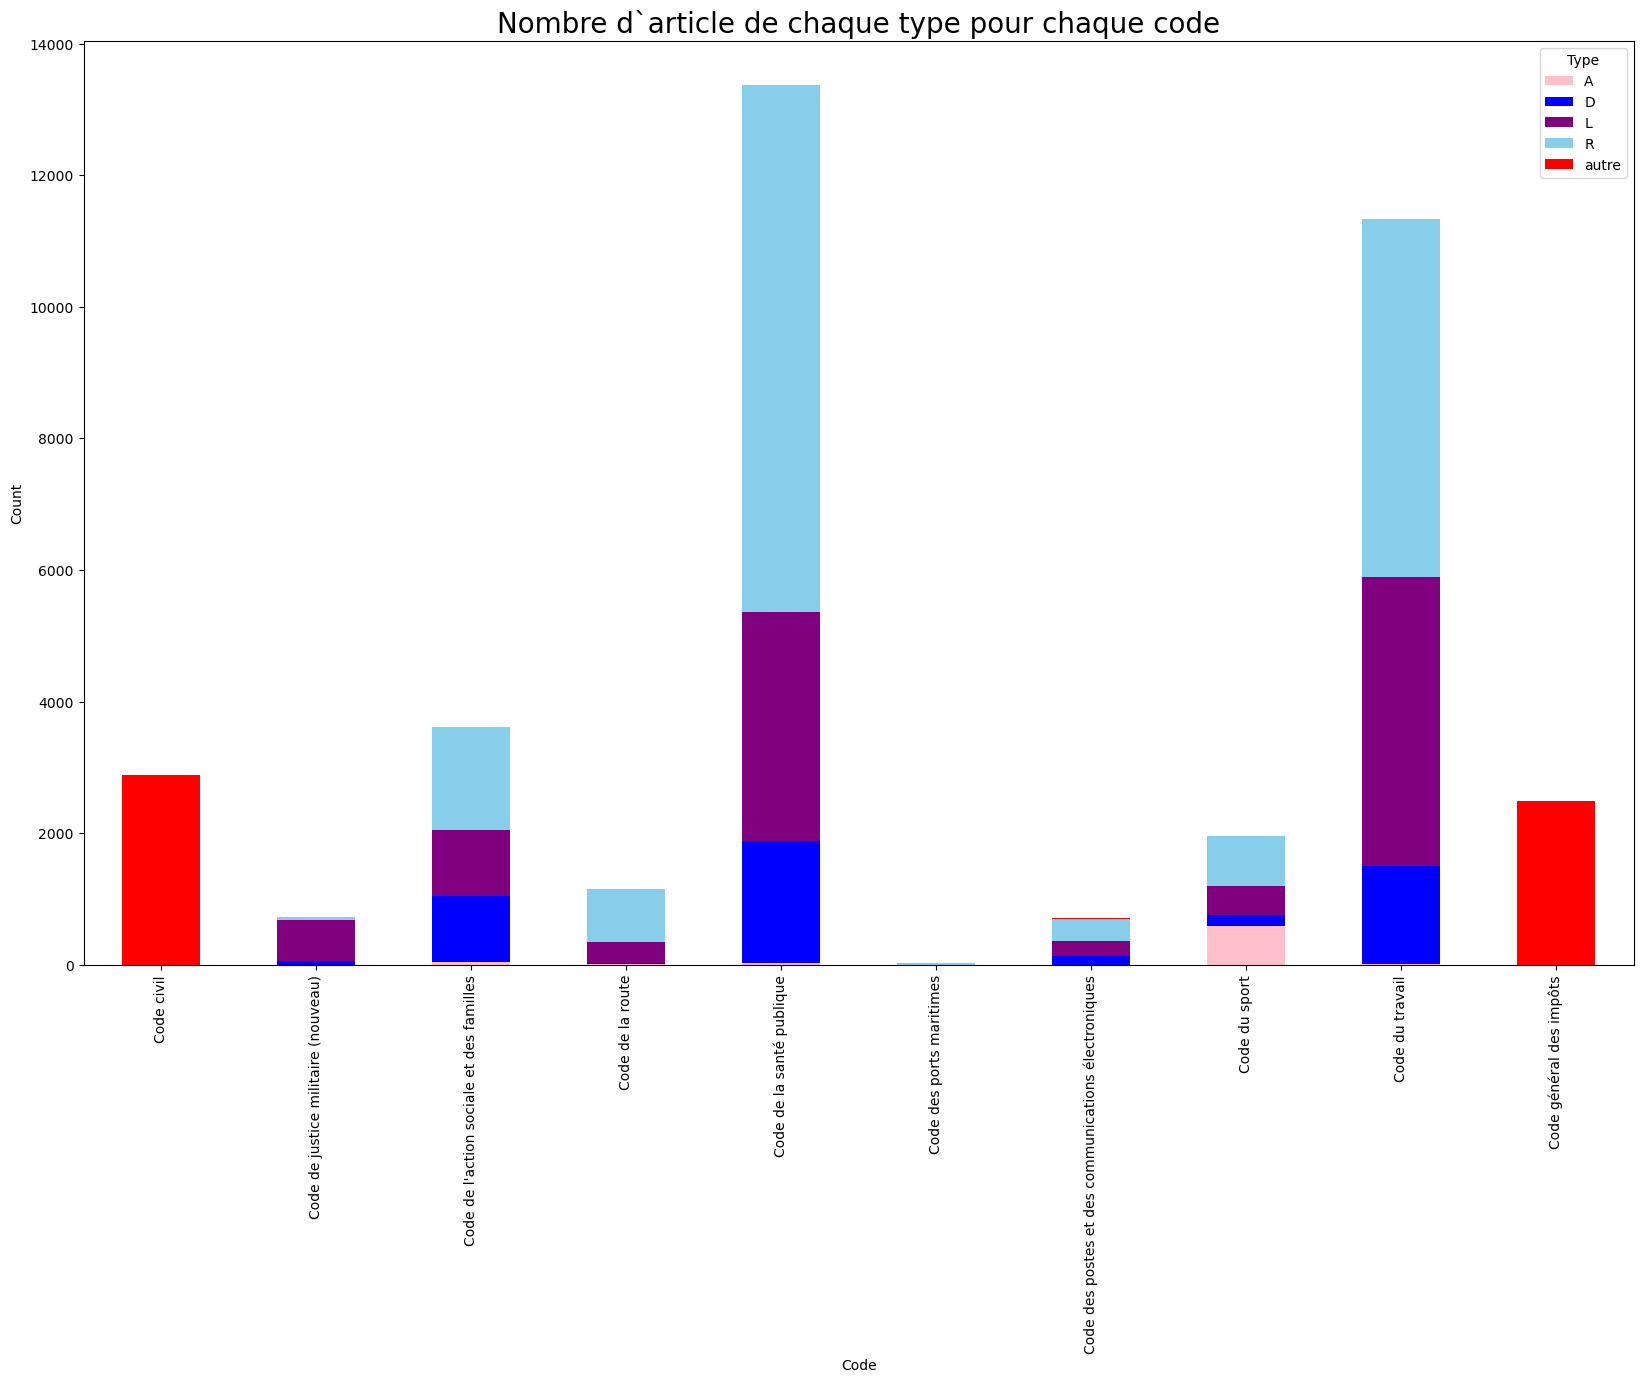

In [87]:
# Nombre d'article de chaque type pour chaque code  

counts = colonnes.groupby(['code', 'type']).size().unstack(fill_value=0)

counts.plot(kind='bar', stacked=True, figsize=(20, 12), color =["pink", "blue", "purple", "skyblue", "red"])
plt.xlabel('Code')
plt.ylabel('Count')
plt.title('Nombre d`article de chaque type pour chaque code', fontsize = 20)
plt.legend(title='Type')
plt.show()

## Les mots les plus courants dans les 10 codes de la loi 

In [89]:
freq = pd.read_csv("../data/freq_mots_10.csv")
freq
print(freq)

                       code      mot  freq
0                Code civil  article   828
1                Code civil      cas   761
2                Code civil      été   696
3                Code civil     acte   543
4                Code civil    époux   512
..                      ...      ...   ...
95  Code général des impôts  présent  2488
96  Code général des impôts     code  2455
97  Code général des impôts   alinéa  2395
98  Code général des impôts  montant  2350
99  Code général des impôts    année  2128

[100 rows x 3 columns]


/tmp/ipykernel_88366/775063564.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(codes))


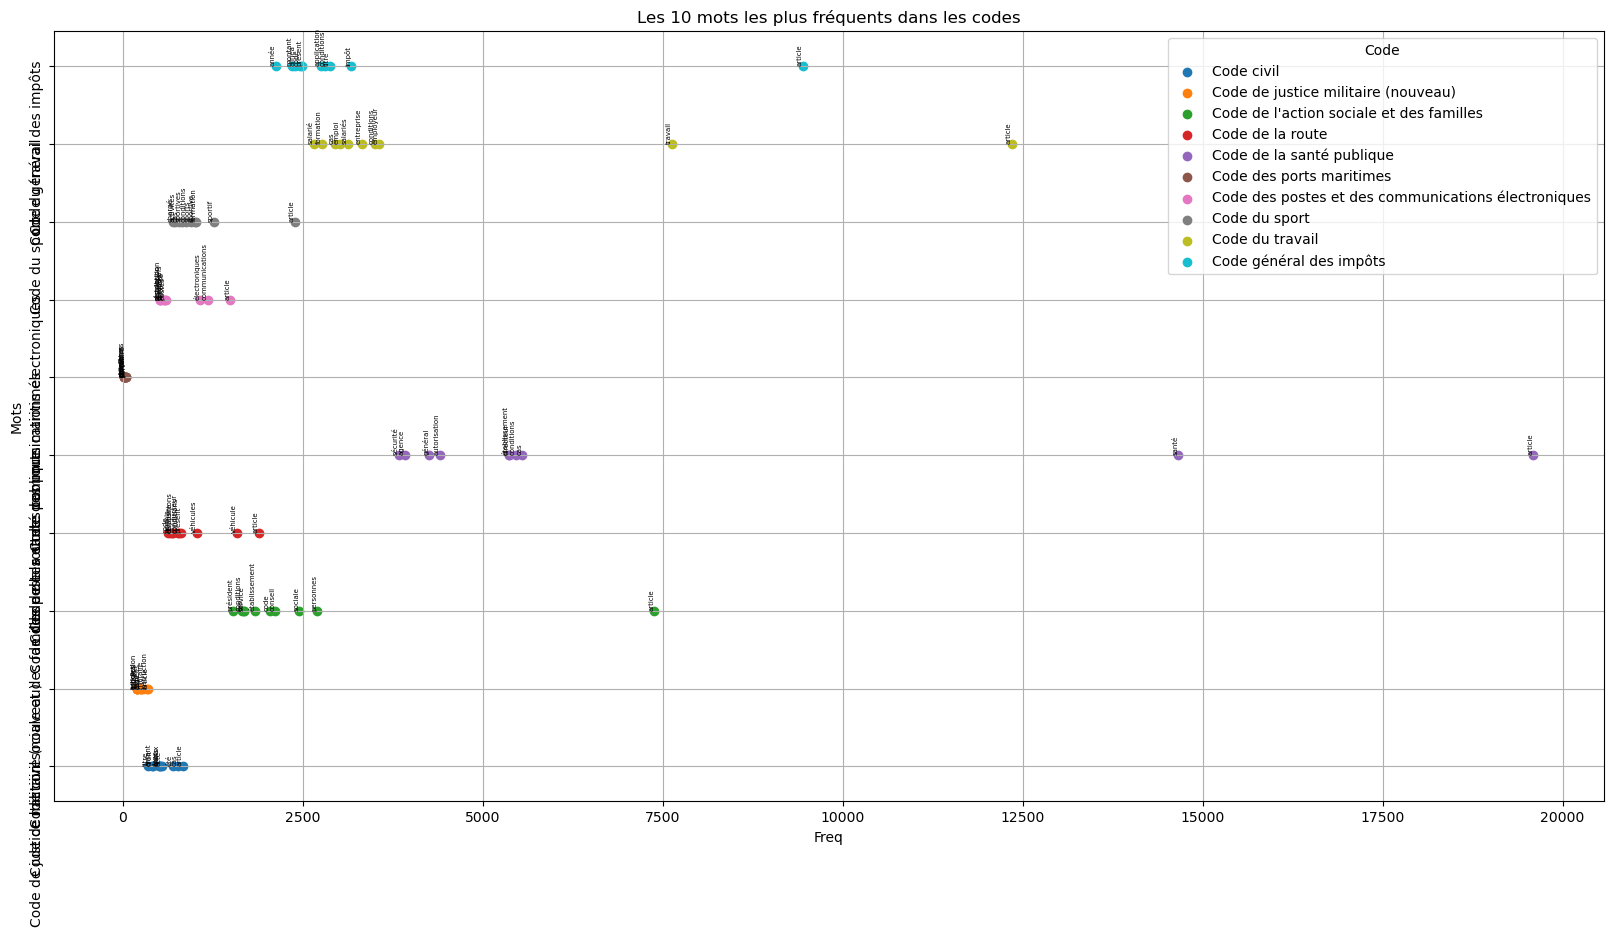

In [90]:
# Les 10 mots les plus fréquents selon les codes 

plt.figure(figsize=(20, 10))

# Une couleur par code
codes = freq['code'].unique()
colors = plt.cm.get_cmap('tab10', len(codes))

# Création du plot 
for i, code in enumerate(codes):
    subset = freq[freq['code'] == code]
    plt.scatter(subset['freq'], [code] * len(subset), label=code, color=colors(i))

    # Add labels to each point
    for i in range(len(subset)):
        plt.text(subset['freq'].iloc[i], code, subset['mot'].iloc[i], fontsize=5,
                    ha='right', va='bottom', rotation=90)


#plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.xlabel('Freq')
plt.ylabel('Mots')
plt.title('Les 10 mots les plus fréquents dans les codes')
plt.legend(title='Code')
plt.grid(True)
plt.show()

/tmp/ipykernel_88366/2869321515.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(codes))


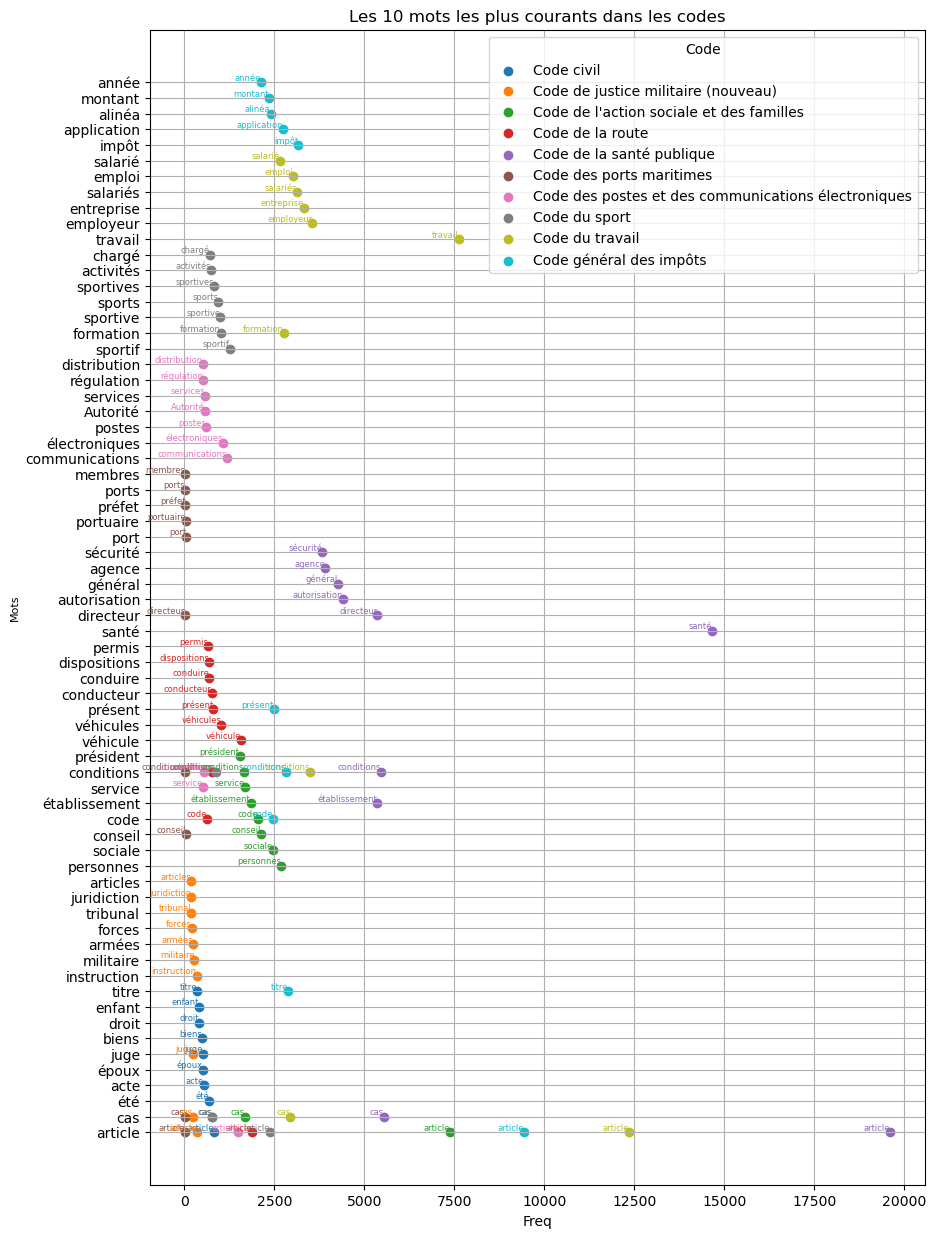

In [91]:
plt.figure(figsize=(10, 15))

# Assign unique colors to each code
codes = freq['code'].unique()
colors = plt.cm.get_cmap('tab10', len(codes))
color_map = {code: colors(idx) for idx, code in enumerate(codes)}

# Create scatter plot
for idx, code in enumerate(codes):
    subset = freq[freq['code'] == code]
    plt.scatter(subset['freq'], subset['mot'], label=code, color=color_map[code])

    # Add labels to each point
    for i in range(len(subset)):
        plt.text(subset['freq'].iloc[i], subset['mot'].iloc[i], subset['mot'].iloc[i], fontsize=6,
                    ha='right', va='bottom', color=color_map[code])

plt.xlabel('Freq')
plt.ylabel('Mots', fontsize = 8)
plt.title('Les 10 mots les plus courants dans les codes')
plt.legend(title='Code')
plt.grid(True)

plt.show()


In [92]:
# Comparaison du nombre d'occurences du mot "artice" et du nombre d'articles dans le code

# Loi de Zipf 

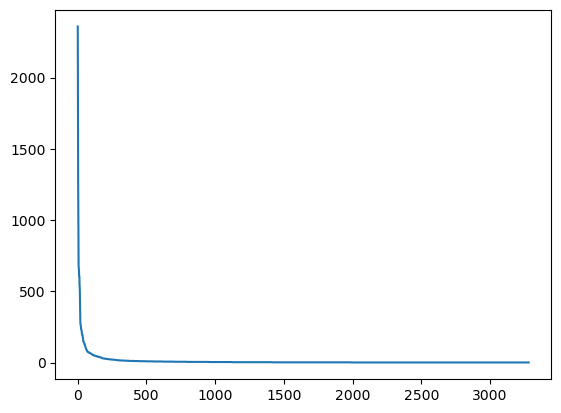

In [93]:
## LOI DE ZIPF avec les textes de lois 

from collections import Counter
from datasets import load_dataset

concat_article = []
for i, element in enumerate(data.itertuples()):
    #print(element)
    doc = nlp(element.body)
    #print(doc)
    for token in doc:
        concat_article.append(str(token))
    if i>500:
        break

concat_counter = Counter(concat_article)
plt.plot(sorted(concat_counter.values(), reverse=True))

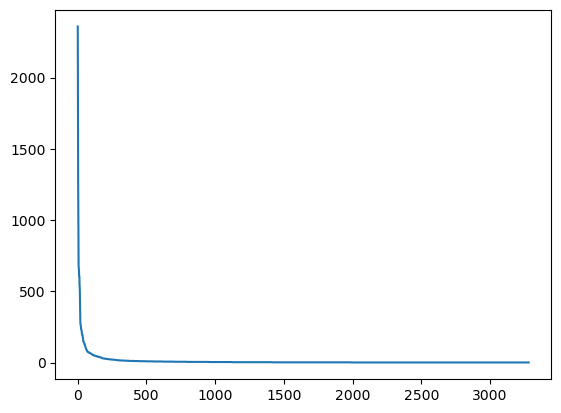

In [95]:
## LOI DE ZIPF avec les textes de lois lemmatisés 

from collections import Counter
from datasets import load_dataset

concat_article = []
for i, article in enumerate(data.itertuples()):
    doc = nlp(article.body)
    #print(doc)
    for token in doc:
        concat_article.append(str(token))
    if i>500:
        break

concat_counter = Counter(concat_article)
plt.plot(sorted(concat_counter.values(), reverse=True))